# **Cases de SQL**

## Objetivo:

Demonstrar habilidades em SQL e pensamento analítico, aplicando consultas para resolver problemas de negócios reais.  
Os cases incluem extração de dados, cálculos de métricas e manipulação de tabelas relacionadas para gerar insights estratégicos.

## Resumo dos Cases:

**Case 1:** Encontrar datas e descrições de instalações com pontuação baixa em inspeções de saúde.  
**Case 2:** Calcular a diferença entre os maiores salários dos departamentos de marketing e engenharia.  
**Case 3:** Exibir dados de clientes e pedidos, incluindo clientes sem pedidos, ordenados por nome e detalhes do pedido.  
**Case 4:** Verificar contas premium pagas que permanecem ativas após sete dias, considerando apenas as primeiras datas do período.  
**Case 5:** Calcular a relação entre taxas de retenção de usuários em dezembro/2020 e janeiro/2021 por conta.  
**Case 6:** Identificar o client_id mais popular baseado em eventos relacionados a chamadas.  

## Foram aplicandos:

- Análises Exploratórias  
- Consultas SQL
- Análises complementares e gráficos para melhor detalhamento do resultado. 

---

### Declara as bibliotecas:

In [30]:
import pandas as pd
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import duckdb
from datetime import datetime
import numpy as np
import seaborn as sns

### Declara função para validações padrões de todas as bases:

In [12]:
def valida_df (df, name="Base de Dados"):
    """
    Valida e exibe informações exploratórias de um DataFrame.

    Parâmetros:
    - df (pd.DataFrame): O DataFrame a ser validado.
    - name (str): Nome da base (para identificação nos títulos).
    """
    # Primeiras linhas
    display(Markdown("### 1 - Primeiras linhas do arquivo"))
    display(df.head())

    # Quantidade de linhas e colunas
    display(Markdown("### 2 - Quantidade de linhas e colunas"))
    print(df.shape)

    # Tipos de dados
    display(Markdown("### 3 - Tipos de dados"))
    print(df.info())

    # Estatísticas descritivas
    display(Markdown("### 4 - Estatísticas descritivas"))
    display(df.describe(include='all'))

    # Valores ausentes
    display(Markdown("### 5 - Valores ausentes por coluna"))
    print(df.isnull().sum())

    # Valores únicos
    display(Markdown("### 6 - Valores únicos por coluna"))
    print(df.nunique())

    # Valores duplicados
    display(Markdown("### 7 - Valores duplicados"))
    print(df.duplicated().sum())

---

## **Case 1**
Objetivo: Encontre a **data da atividade** e a **pe_description** das instalações com o nome '**STREET CHURROS**' e com uma **pontuação inferior a 95 pontos**.

**Tabela:** los_angeles_restaurant_health_inspections

A base contém informações sobre inspeções sanitárias realizadas em restaurantes do condado de Los Angeles, Califórnia, EUA.

**Dicionário de dados:**

| **Campo**               | **Tipo**      | **Descrição**                                                                 |
|-------------------------|---------------|-------------------------------------------------------------------------------|
| **serial_number**       | `varchar`     | Identificador único para o registro da inspeção.                             |
| **activity_date**       | `datetime`    | Data da inspeção realizada no estabelecimento.                               |
| **facility_name**       | `varchar`     | Nome do estabelecimento inspecionado.                                        |
| **score**               | `int`         | Nota da inspeção sanitária.                                                  |
| **grade**               | `varchar`     | Classificação atribuída à inspeção (A, B, C, etc.).                          |
| **service_code**        | `int`         | Código do serviço relacionado ao estabelecimento.                            |
| **service_description** | `varchar`     | Descrição do serviço relacionado ao código informado.                        |
| **employee_id**         | `varchar`     | Identificador do inspetor responsável.                                       |
| **facility_address**    | `varchar`     | Endereço do estabelecimento inspecionado.                                    |
| **facility_city**       | `varchar`     | Cidade onde o estabelecimento está localizado.                               |
| **facility_id**         | `varchar`     | Identificador único do estabelecimento.                                      |
| **facility_state**      | `varchar`     | Estado onde o estabelecimento está localizado.                               |
| **facility_zip**        | `varchar`     | Código postal (CEP) do estabelecimento.                                      |
| **owner_id**            | `varchar`     | Identificador único do proprietário do estabelecimento.                      |
| **owner_name**          | `varchar`     | Nome do proprietário do estabelecimento.                                     |
| **pe_description**      | `varchar`     | Descrição do elemento do programa relacionado ao serviço.                    |
| **program_element_pe**  | `int`         | Código do elemento do programa relacionado ao serviço.                       |
| **program_name**        | `varchar`     | Nome do programa de saúde pública ou serviço associado à inspeção.           |
| **program_status**      | `varchar`     | Status do programa ou serviço (ativo, inativo, etc.).                        |
| **record_id**           | `varchar`     | Identificador único do registro na tabela.                                   |

## Leitura e validação:

In [13]:
# Carregar o CSV
df_restaurant = pd.read_csv('../Data/Raw/los_angeles_restaurant_health_inspections.csv', sep=";")

valida_df(df_restaurant, 'los_angeles_restaurant_health_inspections')

### 1 - Primeiras linhas do arquivo

,erial_number,activity_date,facility_name,score,grade,service_code,service_description,employee_id,facility_address,facility_city,facility_id,facility_state,facility_zip,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id
0,DAQHRSETQ,08/06/2017,MARGARITAS CAFE,93,A,1,ROUTINE INSPECTION,EE0000006,5026 S CRENSHAW BLVD,LOS ANGELES,FA0023656,CA,90043,OW0004133,"BAZAN, ASCENCION",RESTAURANT (61-150) SEATS HIGH RISK,1638,MARGARITAS CAFE,ACTIVE,PR0011718
1,DA2GQRJOS,07/03/2017,LAS MOLENDERAS,97,A,1,ROUTINE INSPECTION,EE0000997,2635 WHITTIER BLVD,LOS ANGELES,FA0160416,CA,90023,OW0125379,MARISOL FEREGRINO,RESTAURANT (0-30) SEATS HIGH RISK,1632,LAS MOLENDERAS,INACTIVE,PR0148504
2,DAMQTA46T,22/03/2016,SANDRA'S TAMALES,93,A,1,ROUTINE INSPECTION,EE0001049,5390 WHITTIER BLVD,LOS ANGELES,FA0171769,CA,90022-4032,OW0178828,SANDRA'S TAMALES INC.,RESTAURANT (0-30) SEATS MODERATE RISK,1631,SANDRA'S TAMALES,ACTIVE,PR0164225
3,DAXMBTIRZ,12/02/2018,CAFE GRATITUDE,97,A,1,ROUTINE INSPECTION,EE0000828,639 N LARCHMONT BLVD STE #102,LOS ANGELES,FA0058921,CA,90004,OW0005704,CAFE GRATITUDE LARCHMONT LLC,RESTAURANT (61-150) SEATS HIGH RISK,1638,CAFE GRATITUDE,ACTIVE,PR0019854
4,DAK8TBMS0,10/09/2015,THE WAFFLE,90,A,1,ROUTINE INSPECTION,EE0000709,6255 W SUNSET BLVD STE #105,LOS ANGELES,FA0051830,CA,90028,OW0035796,"THE WAFFLE, LLC",RESTAURANT (61-150) SEATS HIGH RISK,1638,THE WAFFLE,ACTIVE,PR0010922


### 2 - Quantidade de linhas e colunas

(299, 20)


### 3 - Tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   erial_number         299 non-null    object
 1   activity_date        299 non-null    object
 2   facility_name        299 non-null    object
 3   score                299 non-null    int64 
 4   grade                299 non-null    object
 5   service_code         299 non-null    int64 
 6   service_description  299 non-null    object
 7   employee_id          299 non-null    object
 8   facility_address     299 non-null    object
 9   facility_city        299 non-null    object
 10  facility_id          299 non-null    object
 11  facility_state       299 non-null    object
 12  facility_zip         299 non-null    object
 13  owner_id             299 non-null    object
 14  owner_name           299 non-null    object
 15  pe_description       299 non-null    object
 16  program_

### 4 - Estatísticas descritivas

,erial_number,activity_date,facility_name,score,grade,service_code,service_description,employee_id,facility_address,facility_city,facility_id,facility_state,facility_zip,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id
count,299,299,299,299.000000,299,299.000000,299,299,299,299,299,299,299,299,299,299,299.000000,297,299,299
unique,299,236,229,NaN,3,NaN,2,75,231,1,232,1,71,217,214,15,NaN,229,2,233
top,DAE6M32LL,27/01/2016,TAMALES ALBERTO,NaN,A,NaN,ROUTINE INSPECTION,EE0000721,1644 W TEMPLE ST,LOS ANGELES,FA0071840,CA,90045,OW0000115,"110 SUNSHINE SMOOTHIES, INC",RESTAURANT (0-30) SEATS HIGH RISK,NaN,TAMALES ALBERTO,ACTIVE,PR0046859
freq,1,5,7,NaN,264,NaN,289,20,7,299,7,299,21,15,15,67,NaN,7,273,7
mean,NaN,NaN,NaN,92.692308,NaN,14.377926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1630.247492,NaN,NaN,NaN
std,NaN,NaN,NaN,5.932419,NaN,72.038587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.731199,NaN,NaN,NaN
min,NaN,NaN,NaN,70.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1610.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,91.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1631.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,94.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1632.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,96.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1635.000000,NaN,NaN,NaN


### 5 - Valores ausentes por coluna

erial_number           0
activity_date          0
facility_name          0
score                  0
grade                  0
service_code           0
service_description    0
employee_id            0
facility_address       0
facility_city          0
facility_id            0
facility_state         0
facility_zip           0
owner_id               0
owner_name             0
pe_description         0
program_element_pe     0
program_name           2
program_status         0
record_id              0
dtype: int64


### 6 - Valores únicos por coluna

erial_number           299
activity_date          236
facility_name          229
score                   27
grade                    3
service_code             2
service_description      2
employee_id             75
facility_address       231
facility_city            1
facility_id            232
facility_state           1
facility_zip            71
owner_id               217
owner_name             214
pe_description          15
program_element_pe      15
program_name           229
program_status           2
record_id              233
dtype: int64


### 7 - Valores duplicados

0


## Validações específicas do case:

In [14]:
# Filtrar o DataFrame pelo nome do restaurante 'STREET CHURROS'
df_valida = df_restaurant[df_restaurant['facility_name'] == 'STREET CHURROS']

# Contar o número de registros (linhas) para o restaurante filtrado
count = df_valida.shape[0]


print(f"Quantidade de registros na base para o restautante STREET CHURROS': {count}")



Quantidade de registros na base para o restautante STREET CHURROS': 3


## Consulta:

In [15]:
query = """
SELECT FACILITY_NAME, SCORE, 
       ACTIVITY_DATE,
       PE_DESCRIPTION
FROM df_restaurant
WHERE 1 = 1
  AND FACILITY_NAME = 'STREET CHURROS'
  AND SCORE < 95
"""

# Executar o SQL
result = duckdb.query(query).to_df()

# Mostrar o resultado
display(result)

,facility_name,score,activity_date,pe_description
0,STREET CHURROS,93,29/12/2017,RESTAURANT (0-30) SEATS LOW RISK
1,STREET CHURROS,91,01/12/2016,RESTAURANT (0-30) SEATS LOW RISK
2,STREET CHURROS,94,16/06/2016,RESTAURANT (0-30) SEATS LOW RISK


## Resultado: 

Houveram somente 3 inspeções sanitárias no restaurante STREET CHURROS, todas com pontuação inferior a 95, no período entre 06/2026 e 12/2027. 

Em todas as inspeções, o estabelecimento recebeu a classificação "RESTAURANT (0-30) SEATS LOW RISK", indicando que o restaurante possui capacidade para até 30 pessoas e é classificado como de baixo risco sanitário.

---

## **Case 2**
Objetivo: Escreva uma consulta que **calcule a diferença entre os maiores salários** encontrados nos departamentos de **marketing e engenharia**. Exiba apenas a **diferença absoluta** entre os salários.

**Tabelas:** db_employee e db_dept.

Tabela **db_employee** - Armazena informações sobre os funcionários de uma organização. 

**Dicionário de dados:**

| **Campo**         | **Tipo**  | **Descrição**                                              |
|-------------------|-----------|----------------------------------------------------------|
| **id**            | `int`     | Identificador único do empregado (chave primária).        |
| **first_name**    | `varchar` | Primeiro nome do empregado.                               |
| **last_name**     | `varchar` | Sobrenome do empregado.                                   |
| **salary**        | `int`     | Salário do empregado.                                     |
| **department_id** | `int`     | Identificador do departamento ao qual o empregado pertence (chave estrangeira). |


Tabela **db_dept** - Armazenar informações sobre os departamentos da organização.

**Dicionário de dados:**

| **Campo**      | **Tipo**  | **Descrição**                                  |
|----------------|-----------|-----------------------------------------------|
| **id**         | `int`     | Identificador único do departamento (chave primária). |
| **department** | `varchar` | Nome do departamento.                          |


## Leitura e validação:

In [16]:
# Carregar o CSV
df_db_employee = pd.read_csv('../Data/Raw/db_employee.csv', sep=";")

valida_df(df_db_employee, 'db_employee')

### 1 - Primeiras linhas do arquivo

,id,first_name,last_name,salary,department_id
0,10301,Keith,Morgan,27056,2
1,10302,Tyler,Booth,32199,3
2,10303,Clifford,Nguyen,32165,2
3,10304,Mary,Jones,49488,3
4,10305,Melissa,Lucero,27024,3


### 2 - Quantidade de linhas e colunas

(21, 5)


### 3 - Tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             21 non-null     int64 
 1   first_name     21 non-null     object
 2   last_name      21 non-null     object
 3   salary         21 non-null     int64 
 4   department_id  21 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 968.0+ bytes
None


### 4 - Estatísticas descritivas

,id,first_name,last_name,salary,department_id
count,21.000000,21,21,21.000000,21.000000
unique,NaN,20,21,NaN,NaN
top,NaN,Melissa,Cook,NaN,NaN
freq,NaN,2,1,NaN,NaN
mean,10311.000000,NaN,NaN,31032.857143,3.142857
std,6.204837,NaN,NaN,10680.328807,1.621287
min,10301.000000,NaN,NaN,12984.000000,1.000000
25%,10306.000000,NaN,NaN,22681.000000,2.000000
50%,10311.000000,NaN,NaN,31160.000000,3.000000
75%,10316.000000,NaN,NaN,37494.000000,4.000000


### 5 - Valores ausentes por coluna

id               0
first_name       0
last_name        0
salary           0
department_id    0
dtype: int64


### 6 - Valores únicos por coluna

id               21
first_name       20
last_name        21
salary           21
department_id     6
dtype: int64


### 7 - Valores duplicados

0


In [17]:
# Carregar o CSV
df_db_dept = pd.read_csv('../Data/Raw/db_dept.csv', sep=";")

valida_df(df_db_dept, 'db_dept')

### 1 - Primeiras linhas do arquivo

,id,department
0,1,engineering
1,2,human resource
2,3,operation
3,4,marketing
4,5,sales


### 2 - Quantidade de linhas e colunas

(6, 2)


### 3 - Tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          6 non-null      int64 
 1   department  6 non-null      object
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes
None


### 4 - Estatísticas descritivas

,id,department
count,6.000000,6
unique,NaN,6
top,NaN,operation
freq,NaN,1
mean,3.500000,NaN
std,1.870829,NaN
min,1.000000,NaN
25%,2.250000,NaN
50%,3.500000,NaN
75%,4.750000,NaN


### 5 - Valores ausentes por coluna

id            0
department    0
dtype: int64


### 6 - Valores únicos por coluna

id            6
department    6
dtype: int64


### 7 - Valores duplicados

0


## Consulta:
- SQL pensando para a melhoria de performance com execução do where uma única vez.
- Aplicado ABS para trazer o valor absoluto.
- Incluí o campo de Maior para dar mais detalhe ao resultado da análise.

In [19]:
query = """
WITH SALARIOS AS (
SELECT CASE WHEN UPPER(B.DEPARTMENT) = 'MARKETING' THEN SALARY ELSE 0 END AS SALARY_MKT
      ,CASE WHEN UPPER(B.DEPARTMENT) = 'ENGINEERING' THEN SALARY ELSE 0 END AS SALARY_ENG
FROM df_db_employee A
INNER JOIN df_db_dept B
ON A.DEPARTMENT_ID = B.ID
WHERE 1 = 1
    AND UPPER(B.DEPARTMENT) IN ('MARKETING', 'ENGINEERING')
)
SELECT
    ABS(MAX(SALARY_MKT) - MAX(SALARY_ENG)) AS SALARY_DIF
    ,CASE WHEN MAX(SALARY_MKT) > MAX(SALARY_ENG) THEN 'MKT'
          WHEN MAX(SALARY_MKT) < MAX(SALARY_ENG) THEN 'ENG'
          ELSE 'N/A' END AS MAIOR

FROM
    SALARIOS
"""

# Executar o SQL
result = duckdb.query(query).to_df()

# Mostrar o resultado
display(result)

,SALARY_DIF,MAIOR
0,13285,MKT


## Resultado: 

A diferença de salários máximos entre os departamentos de Marketing e Engenharia é de  $13.285,00, sendo Marketing o departamento com maior valor.

---

## **Case 3**
Objetivo: **Encontre os detalhes de cada cliente**, independentemente de **o cliente ter feito um pedido**.  
**Exiba o primeiro nome**, o **sobrenome** e a **cidade do cliente** junto com os **detalhes do pedido**.  
**Ordene os registros** com base no **primeiro nome do cliente** e nos **detalhes do pedido** em **ordem ascendente**.

**Tabelas:** customers e orders.

Tabela **customers** - Armazena informações sobre os clientes. 

**Dicionário de dados:**

| **Campo**        | **Tipo**      | **Descrição**                                             |
|------------------|---------------|---------------------------------------------------------|
| **id**           | `int`         | Identificador único do cliente (chave primária).        |
| **first_name**   | `varchar`     | Primeiro nome do cliente.                               |
| **last_name**    | `varchar`     | Sobrenome do cliente.                                   |
| **city**         | `varchar`     | Cidade onde o cliente reside.                          |
| **address**      | `varchar`     | Endereço completo do cliente.                          |
| **phone_number** | `varchar`     | Número de telefone do cliente.                         |


Tabela **orders** - Armazenar informações sobre os pedidos dos clientes.

**Dicionário de dados:**

| **Campo**           | **Tipo**      | **Descrição**                                               |
|---------------------|---------------|-----------------------------------------------------------|
| **id**              | `int`         | Identificador único do pedido (chave primária).           |
| **cust_id**         | `int`         | Identificador do cliente que realizou o pedido (chave estrangeira). |
| **order_date**      | `datetime`    | Data em que o pedido foi realizado.                       |
| **order_details**   | `varchar`     | Detalhes sobre os itens ou serviços incluídos no pedido.  |
| **total_order_cost**| `int`         | Custo total do pedido.                                    |

## Leitura e validação:

In [20]:
# Carregar o CSV
df_customers = pd.read_csv('../Data/Raw/customers.csv', sep=";")
valida_df(df_customers, 'customers')

### 1 - Primeiras linhas do arquivo

,id,first_name,last_name,city,address,phone_number
0,8,John,Joseph,San Francisco,NaN,928-386-8164
1,7,Jill,Michael,Austin,NaN,813-297-0692
2,4,William,Daniel,Denver,NaN,813-368-1200
3,5,Henry,Jackson,Miami,NaN,808-601-7513
4,13,Emma,Isaac,Miami,NaN,808-690-5201


### 2 - Quantidade de linhas e colunas

(14, 6)


### 3 - Tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            14 non-null     int64 
 1   first_name    14 non-null     object
 2   last_name     14 non-null     object
 3   city          14 non-null     object
 4   address       7 non-null      object
 5   phone_number  14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes
None


### 4 - Estatísticas descritivas

,id,first_name,last_name,city,address,phone_number
count,14.000000,14,14,14,7,14
unique,NaN,14,13,6,7,13
top,NaN,Liam,Joseph,Miami,4470 McKinley Avenue,813-368-1200
freq,NaN,1,2,4,1,2
mean,7.785714,NaN,NaN,NaN,NaN,NaN
std,4.560340,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,4.250000,NaN,NaN,NaN,NaN,NaN
50%,7.500000,NaN,NaN,NaN,NaN,NaN
75%,11.500000,NaN,NaN,NaN,NaN,NaN


### 5 - Valores ausentes por coluna

id              0
first_name      0
last_name       0
city            0
address         7
phone_number    0
dtype: int64


### 6 - Valores únicos por coluna

id              14
first_name      14
last_name       13
city             6
address          7
phone_number    13
dtype: int64


### 7 - Valores duplicados

0


In [22]:
# Carregar o CSV
df_orders = pd.read_csv('../Data/Raw/orders.csv', sep=";")
valida_df(df_orders, 'orders')

### 1 - Primeiras linhas do arquivo

,id,cust_id,order_date,order_details,total_order_cost
0,1,3,04/03/2019,Coat,100
1,2,3,01/03/2019,Shoes,80
2,3,3,07/03/2019,Skirt,30
3,4,7,01/02/2019,Coat,25
4,5,7,10/03/2019,Shoes,80


### 2 - Quantidade de linhas e colunas

(23, 5)


### 3 - Tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                23 non-null     int64 
 1   cust_id           23 non-null     int64 
 2   order_date        23 non-null     object
 3   order_details     23 non-null     object
 4   total_order_cost  23 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.0+ KB
None


### 4 - Estatísticas descritivas

,id,cust_id,order_date,order_details,total_order_cost
count,23.00000,23.000000,23,23,23.000000
unique,NaN,NaN,13,9,NaN
top,NaN,NaN,01/02/2019,Shirts,NaN
freq,NaN,NaN,4,5,NaN
mean,12.00000,9.043478,NaN,NaN,70.000000
std,6.78233,4.828686,NaN,NaN,43.874822
min,1.00000,3.000000,NaN,NaN,20.000000
25%,6.50000,4.500000,NaN,NaN,40.000000
50%,12.00000,7.000000,NaN,NaN,60.000000
75%,17.50000,15.000000,NaN,NaN,80.000000


### 5 - Valores ausentes por coluna

id                  0
cust_id             0
order_date          0
order_details       0
total_order_cost    0
dtype: int64


### 6 - Valores únicos por coluna

id                  23
cust_id              6
order_date          13
order_details        9
total_order_cost    10
dtype: int64


### 7 - Valores duplicados

0


## Consulta:
- Garanto no resultado todos os registros da tabela de clientes, mesmo que não tenha feito compra (left join).
- Considero a data como o melhor detalhe do pedido para ordenação e o select por padrão já é ascendente. 

In [23]:
query = """
SELECT A.ID
      ,A.FIRST_NAME
      ,A.LAST_NAME
	  ,A.CITY
	  ,B.ORDER_DATE
	  ,B.ORDER_DETAILS
	  ,B.TOTAL_ORDER_COST
FROM df_customers A
LEFT JOIN df_orders B 
ON A.ID = B.CUST_ID
WHERE 1 = 1
ORDER BY A.FIRST_NAME, B.ORDER_DATE
"""

# Executar o SQL
result = duckdb.query(query).to_df()

# Mostrar o resultado
display(result)

,id,first_name,last_name,city,order_date,order_details,total_order_cost
0,13,Emma,Isaac,Miami,None,None,NaN
1,12,Eva,Lucas,Arizona,11/01/2019,Shirts,60.0
2,12,Eva,Lucas,Arizona,11/01/2019,Coat,125.0
3,12,Eva,Lucas,Arizona,11/03/2019,Slipper,20.0
4,3,Farida,Joseph,San Francisco,01/03/2019,Shoes,80.0
5,3,Farida,Joseph,San Francisco,04/03/2019,Coat,100.0
6,3,Farida,Joseph,San Francisco,07/03/2019,Skirt,30.0
7,3,Farida,Joseph,San Francisco,19/04/2019,Shirts,50.0
8,5,Henry,Jackson,Miami,01/02/2019,Shoes,80.0
9,6,Jack,Aiden,Arizona,None,None,NaN


## Validações específicas do case:

In [24]:
# Contar o número de pares distintos de ['first_name', 'last_name']
distinct_names_count = len(df_customers[['first_name', 'last_name']].drop_duplicates())

# Exibir o resultado
print(f"Quantidade de pares distintos de 'first_name' e 'last_name': {distinct_names_count}")
print(f"Quantidade de registros na base': {len(df_customers)}")



Quantidade de pares distintos de 'first_name' e 'last_name': 14
Quantidade de registros na base': 14


In [25]:
# Filtrar o DataFrame pelas linhas em que 'order_date' é nulo
df_valida = result[result['order_date'].isnull()]

# Contar quantos nomes distintos (combinação de first_name e last_name) existem
distinct_names_count = df_valida[['first_name', 'last_name']].drop_duplicates().shape[0]

print(f"Quantidade de clientes que não compraram': {distinct_names_count}")


Quantidade de clientes que não compraram': 8


In [26]:
# Contar o número de pedidos por cliente (agrupando por first_name e last_name)
frequency_table = result.groupby(['first_name', 'last_name']).size().reset_index(name='order_count')

# Ordenar pela quantidade de pedidos (opcional, para visualizar do maior para o menor)
frequency_table_sorted = frequency_table.sort_values(by='order_count', ascending=False)

# Exibir a tabela de frequência
print(frequency_table_sorted)

   first_name  last_name  order_count
11        Mia       Owen            7
5        Jill    Michael            6
2      Farida     Joseph            4
1         Eva      Lucas            3
13    William     Daniel            2
0        Emma      Isaac            1
3       Henry    Jackson            1
4        Jack      Aiden            1
6        John     Joseph            1
7      Justin  Alexander            1
8        Liam     Samuel            1
9        Lili     Oliver            1
10       Mark     Thomas            1
12       Mona     Adrian            1


In [27]:
# Filtrar o DataFrame para excluir os clientes com 'order_date' nulo
filtered_result = result[result['order_date'].notnull()]

# Agrupar por cliente e somar os valores de 'total_order_cost'
total_spent_per_customer = filtered_result.groupby(['first_name', 'last_name'])['total_order_cost'].sum().reset_index()

# Ordenar pela soma de 'total_order_cost' de forma decrescente
sorted_total_spent = total_spent_per_customer.sort_values(by='total_order_cost', ascending=False)

# Exibir o cliente que mais comprou e o valor
most_spent_customer = sorted_total_spent.iloc[0]
print(f"Cliente que mais comprou: {most_spent_customer['first_name']} {most_spent_customer['last_name']}")
print(f"Valor total gasto: {most_spent_customer['total_order_cost']}")

# Exibir o cliente que menos comprou
least_spent_customer = sorted_total_spent.iloc[-1]
print(f"Cliente que menos comprou: {least_spent_customer['first_name']} {least_spent_customer['last_name']}")
print(f"Valor total gasto: {least_spent_customer['total_order_cost']}")

Cliente que mais comprou: Mia Owen
Valor total gasto: 540.0
Cliente que menos comprou: Henry Jackson
Valor total gasto: 80.0


## Resultado: 

A análise abrangeu as compras de 14 clientes. Desses, 57% realizaram 1 compra ou mais.

- O cliente com maior frequência de compras realizou 7 compras, totalizando $540,00 gastos.
- O cliente com menor frequência de compras fez apenas 1 compra, com um gasto total de $80,00.

---

## Análise complementar do Case 3 - RFV:

A análise a seguir apresenta os clientes classificados de acordo com o RFV (Recência, Frequência e Valor), proporcionando uma visão detalhada do comportamento de compra e do valor total gasto por cada cliente.

In [28]:
# Converter 'order_date' para datetime se não estiver no formato correto
result['order_date'] = pd.to_datetime(result['order_date'])

# Calcular a Recência (R): dias desde o último pedido
today = datetime.today()
df_recency = result.groupby(['first_name', 'last_name'])['order_date'].max().reset_index()
df_recency['recency'] = (today - df_recency['order_date']).dt.days

# Calcular a Frequência (F): número de pedidos feitos por cada cliente
df_frequency = result.groupby(['first_name', 'last_name']).size().reset_index(name='frequency')

# Calcular o Valor (V): soma do total gasto por cada cliente
df_value = result.groupby(['first_name', 'last_name'])['total_order_cost'].sum().reset_index(name='value')

# Combinar as três métricas (Recência, Frequência e Valor)
rfv_df = pd.merge(df_recency, df_frequency, on=['first_name', 'last_name'])
rfv_df = pd.merge(rfv_df, df_value, on=['first_name', 'last_name'])

# Exibir a tabela RFV
print(rfv_df)

   first_name  last_name order_date  recency  frequency  value
0        Emma      Isaac        NaT      NaN          1    0.0
1         Eva      Lucas 2019-11-03   1869.0          3  205.0
2      Farida     Joseph 2019-07-03   1992.0          4  260.0
3       Henry    Jackson 2019-01-02   2174.0          1   80.0
4        Jack      Aiden        NaT      NaN          1    0.0
5        Jill    Michael 2019-10-03   1900.0          6  385.0
6        John     Joseph        NaT      NaN          1    0.0
7      Justin  Alexander        NaT      NaN          1    0.0
8        Liam     Samuel        NaT      NaN          1    0.0
9        Lili     Oliver        NaT      NaN          1    0.0
10       Mark     Thomas        NaT      NaN          1    0.0
11        Mia       Owen 2019-11-03   1869.0          7  540.0
12       Mona     Adrian        NaT      NaN          1    0.0
13    William     Daniel 2019-11-01   1871.0          2  140.0


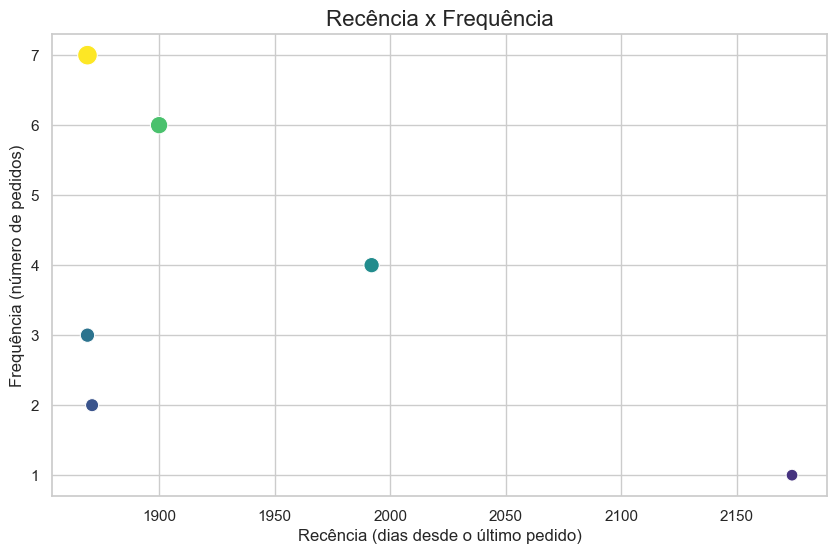

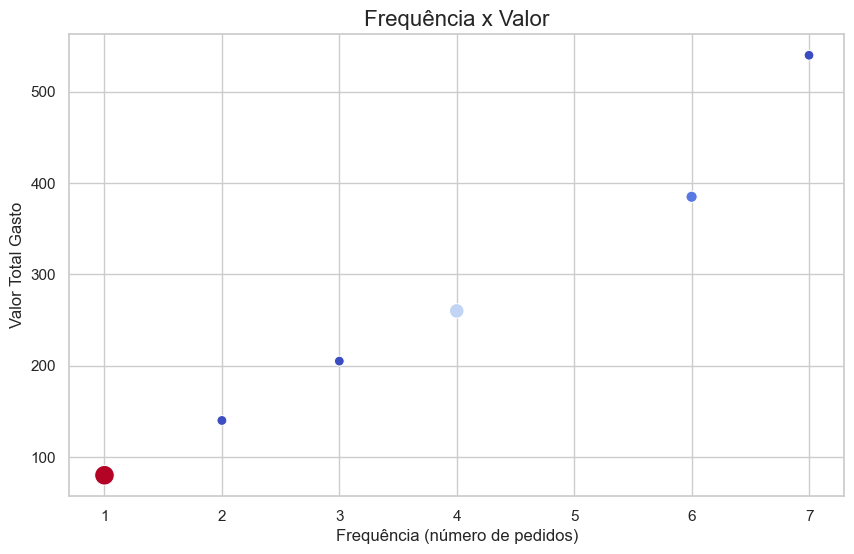

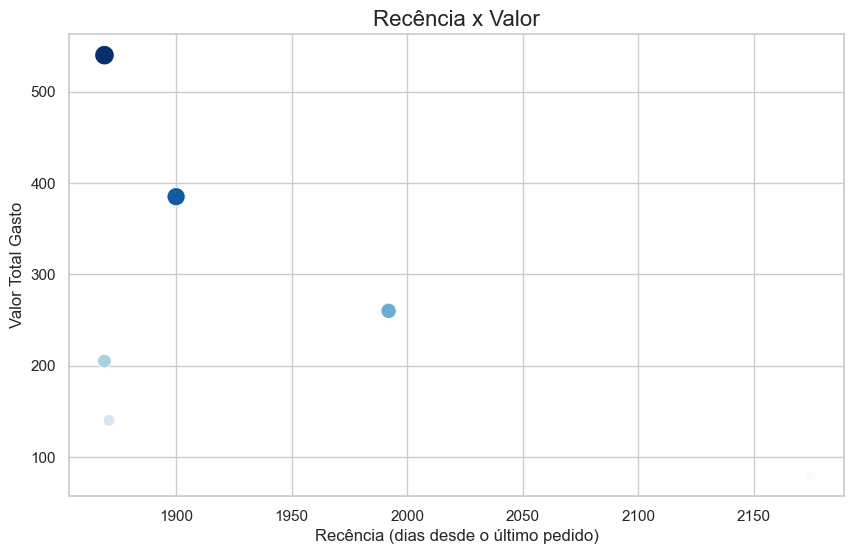

In [31]:
# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Gráfico de dispersão: Recência x Frequência
plt.figure(figsize=(10, 6))
sns.scatterplot(x='recency', y='frequency', data=rfv_df, hue='value', palette='viridis', size='value', sizes=(50, 200), legend=None)
plt.title('Recência x Frequência', fontsize=16)
plt.xlabel('Recência (dias desde o último pedido)', fontsize=12)
plt.ylabel('Frequência (número de pedidos)', fontsize=12)
plt.show()

# Gráfico de dispersão: Frequência x Valor
plt.figure(figsize=(10, 6))
sns.scatterplot(x='frequency', y='value', data=rfv_df, hue='recency', palette='coolwarm', size='recency', sizes=(50, 200), legend=None)
plt.title('Frequência x Valor', fontsize=16)
plt.xlabel('Frequência (número de pedidos)', fontsize=12)
plt.ylabel('Valor Total Gasto', fontsize=12)
plt.show()

# Gráfico de dispersão: Recência x Valor
plt.figure(figsize=(10, 6))
sns.scatterplot(x='recency', y='value', data=rfv_df, hue='frequency', palette='Blues', size='frequency', sizes=(50, 200), legend=None)
plt.title('Recência x Valor', fontsize=16)
plt.xlabel('Recência (dias desde o último pedido)', fontsize=12)
plt.ylabel('Valor Total Gasto', fontsize=12)
plt.show()

In [32]:
# Definir quantis ou intervalos para cada métrica (Recência, Frequência e Valor)
def rfv_score(df):
    # Pontuação para Recência (quanto menor, melhor)
    recency_bins = [0, 7, 30, 60, 90, np.inf]
    recency_labels = [5, 4, 3, 2, 1]
    
    # Criar uma coluna categórica com as categorias definidas
    df['recency_score'] = pd.cut(df['recency'], bins=recency_bins, labels=recency_labels, right=False)
    
    # Garantir que os valores NaN sejam tratados antes da conversão
    df['recency_score'] = df['recency_score'].cat.add_categories([0]).fillna(0)

    # Pontuação para Frequência (quanto maior, melhor)
    frequency_bins = [0, 1, 5, 10, np.inf]
    frequency_labels = [1, 2, 3, 4]
    
    # Criar uma coluna categórica com as categorias definidas
    df['frequency_score'] = pd.cut(df['frequency'], bins=frequency_bins, labels=frequency_labels, right=False)
    
    # Garantir que os valores NaN sejam tratados antes da conversão
    df['frequency_score'] = df['frequency_score'].cat.add_categories([0]).fillna(0)

    # Pontuação para Valor (quanto maior, melhor)
    value_bins = [0, 50, 150, 500, np.inf]
    value_labels = [1, 2, 3, 4]
    
    # Criar uma coluna categórica com as categorias definidas
    df['value_score'] = pd.cut(df['value'], bins=value_bins, labels=value_labels, right=False)
    
    # Garantir que os valores NaN sejam tratados antes da conversão
    df['value_score'] = df['value_score'].cat.add_categories([0]).fillna(0)

    # Convertendo as pontuações para inteiros
    df['recency_score'] = df['recency_score'].astype(int)
    df['frequency_score'] = df['frequency_score'].astype(int)
    df['value_score'] = df['value_score'].astype(int)

    # Pontuação total: Somar as pontuações de Recência, Frequência e Valor
    df['total_rfv_score'] = df['recency_score'] + df['frequency_score'] + df['value_score']

    return df

# Aplicar a função de pontuação RFV
rfv_df2 = rfv_score(rfv_df)

# Ordenar os clientes pela pontuação total de RFV (quanto maior a pontuação, melhor)
rfv_df_sorted = rfv_df2.sort_values(by='total_rfv_score', ascending=False)

# Exibir a tabela com a classificação dos clientes que compraram.
rfv_df_sorted = rfv_df_sorted[rfv_df_sorted['recency'].notnull()]
rfv_df_sorted[['first_name', 'last_name', 'recency', 'frequency', 'value', 'recency_score', 'frequency_score', 'value_score', 'total_rfv_score']]

,first_name,last_name,recency,frequency,value,recency_score,frequency_score,value_score,total_rfv_score
11,Mia,Owen,1869.0,7,540.0,1,3,4,8
5,Jill,Michael,1900.0,6,385.0,1,3,3,7
1,Eva,Lucas,1869.0,3,205.0,1,2,3,6
2,Farida,Joseph,1992.0,4,260.0,1,2,3,6
3,Henry,Jackson,2174.0,1,80.0,1,2,2,5
13,William,Daniel,1871.0,2,140.0,1,2,2,5


## Resultado: 
- Os melhores clientes possuem médias de compra de $462,50 e frequência de aproximadamente 6 vezes.
- Os clientes em precisão de atenção possuem média de compra de $232,50 e frequência de aproximadamente 3 vezes.
- Os clientes inativos ou quase inativos possuem média de compra de $110,00 e frequência de aproximadamente 1 vez.

---



## **Case 4**
Objetivo: Você recebeu um conjunto de dados que fornece o **número de usuários ativos por dia por conta premium.**  
Uma conta premium terá **uma entrada para cada dia em que for premium.**  
No entanto, **uma conta premium pode ser temporariamente descontada e considerada não paga,** o que é indicado por um valor de **0 na coluna final_price** para um determinado dia.  
**Descubra quantas contas premium pagas em um determinado dia ainda são premium e pagas 7 dias depois.**  
**Exiba a data**, o **número de contas premium e pagas naquele dia**, e o **número de quantas dessas contas ainda são premium e pagas 7 dias depois.**  
Como você só tem **dados para um período de 14 dias**, inclua **apenas as primeiras 7 datas disponíveis** no resultado.  

**Tabela:** premium_accounts_by_day.

Armazena informações diárias sobre contas premium e seu status de pagamento, além de usuários ativos nos últimos 7 dias. A base é útil para identificar a retenção de contas premium pagas ao longo do tempo e analisar tendências de comportamento dos usuários.

| **Campo**               | **Tipo**      | **Descrição**                                                    |
|-------------------------|---------------|------------------------------------------------------------------|
| **account_id**          | `varchar`     | Identificador único da conta premium.                            |
| **entry_date**          | `datetime`    | Data da entrada (registro do dia específico para a conta).       |
| **users_visited_7d**    | `int`         | Número de usuários ativos nos últimos 7 dias.                    |
| **final_price**         | `int`         | Preço final pago pela conta naquele dia (0 indica não pago).     |
| **plan_size**           | `int`         | Tamanho do plano associado à conta premium.                      |


## Leitura e validação:

In [33]:
# Carregar o CSV
df_premium = pd.read_csv('../Data/Raw/premium_accounts_by_day.csv', sep=";")

valida_df(df_premium, 'premium_accounts_by_day')

### 1 - Primeiras linhas do arquivo

,account_id,entry_date,users_visited_7d,final_price,plan_size
0,A01,07/02/2022,1,100,10
1,A03,07/02/2022,30,400,50
2,A01,08/02/2022,3,100,10
3,A03,08/02/2022,39,400,50
4,A05,08/02/2022,14,400,50


### 2 - Quantidade de linhas e colunas

(54, 5)


### 3 - Tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   account_id        54 non-null     object
 1   entry_date        54 non-null     object
 2   users_visited_7d  54 non-null     int64 
 3   final_price       54 non-null     int64 
 4   plan_size         54 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB
None


### 4 - Estatísticas descritivas

,account_id,entry_date,users_visited_7d,final_price,plan_size
count,54,54,54.000000,54.000000,54.000000
unique,5,14,NaN,NaN,NaN
top,A03,11/02/2022,NaN,NaN,NaN
freq,14,5,NaN,NaN,NaN
mean,NaN,NaN,127.222222,283.888889,54.074074
std,NaN,NaN,111.336252,291.032104,30.313987
min,NaN,NaN,1.000000,0.000000,10.000000
25%,NaN,NaN,32.500000,20.000000,35.000000
50%,NaN,NaN,103.000000,100.000000,50.000000
75%,NaN,NaN,190.500000,400.000000,70.000000


### 5 - Valores ausentes por coluna

account_id          0
entry_date          0
users_visited_7d    0
final_price         0
plan_size           0
dtype: int64


### 6 - Valores únicos por coluna

account_id           5
entry_date          14
users_visited_7d    50
final_price          7
plan_size            6
dtype: int64


### 7 - Valores duplicados

0


## Consulta:

- Seleciono inicialmente somente os registros com final_price > 0  (contas premium pagas) na base premium_ativo.
- Faço um produto cartesiano entre as datas para encontrar qual é a data que tem a diferença exata de 7 dias e filtro somente esses registros numa base premium_ativo_no_7_dia.
- Na base inicial com todos os registros ativos (premium_ativo), agrupo pela data a contagem de contas dela, a contagem de contas respectiva da base filtrada de 7 dias (premium_ativo_no_7_dia).
- Depois de ordenar as datas da base final em order crescente, filtro somente as 7 primeiras.

In [34]:
query = """
WITH PREMIUM_ATIVO AS (
    SELECT
        ACCOUNT_ID
        -- CONVERTENDO O FORMATO DE DATA 'DD/MM/YYYY' PARA 'YYYY-MM-DD'
        ,CAST(SUBSTRING(ENTRY_DATE, 7, 4) || '-' || SUBSTRING(ENTRY_DATE, 4, 2) || '-' || SUBSTRING(ENTRY_DATE, 1, 2) AS TIMESTAMP) AS ENTRY_DATE
        ,ENTRY_DATE AS DATA
        ,FINAL_PRICE
    FROM
        df_premium
    WHERE 1 = 1
    AND FINAL_PRICE > 0  -- CONSIDERA APENAS AS CONTAS PREMIUM PAGAS
),
PREMIUM_ATIVO_NO_7_DIA AS (
    SELECT
        A.ACCOUNT_ID
        ,A.ENTRY_DATE AS ORIGINAL_ENTRY_DATE
        ,B.ENTRY_DATE AS SETIMO_DIA_ENTRY_DATA
        ,DATEDIFF('DAY', A.ENTRY_DATE, B.ENTRY_DATE) AS DIF
    FROM
        PREMIUM_ATIVO A
    JOIN
        PREMIUM_ATIVO B ON A.ACCOUNT_ID = B.ACCOUNT_ID
    WHERE 1 = 1
    AND DATEDIFF('DAY', A.ENTRY_DATE, B.ENTRY_DATE) = 7  -- DIFERENÇA DE 7 DIAS
)
SELECT
    A.DATA
    ,COUNT(DISTINCT A.ACCOUNT_ID) AS CONTAS_PREMIUM
    ,COUNT(DISTINCT S.ACCOUNT_ID) AS CONTAS_PREMIUM_NO_7_DIA
FROM
    PREMIUM_ATIVO A
LEFT JOIN
    PREMIUM_ATIVO_NO_7_DIA S 
    ON A.ACCOUNT_ID = S.ACCOUNT_ID 
    AND A.ENTRY_DATE = S.ORIGINAL_ENTRY_DATE
GROUP BY
    A.DATA
ORDER BY
    A.DATA
LIMIT 7;  -- LIMITA AOS PRIMEIROS 7 DIAS
"""

# Executar o SQL
result = duckdb.query(query).to_df()

# Mostrar o resultado
display(result)

,DATA,CONTAS_PREMIUM,CONTAS_PREMIUM_NO_7_DIA
0,07/02/2022,2,2
1,08/02/2022,3,2
2,09/02/2022,3,2
3,10/02/2022,4,3
4,11/02/2022,4,1
5,12/02/2022,4,2
6,13/02/2022,4,1


## Gráfico complementar:

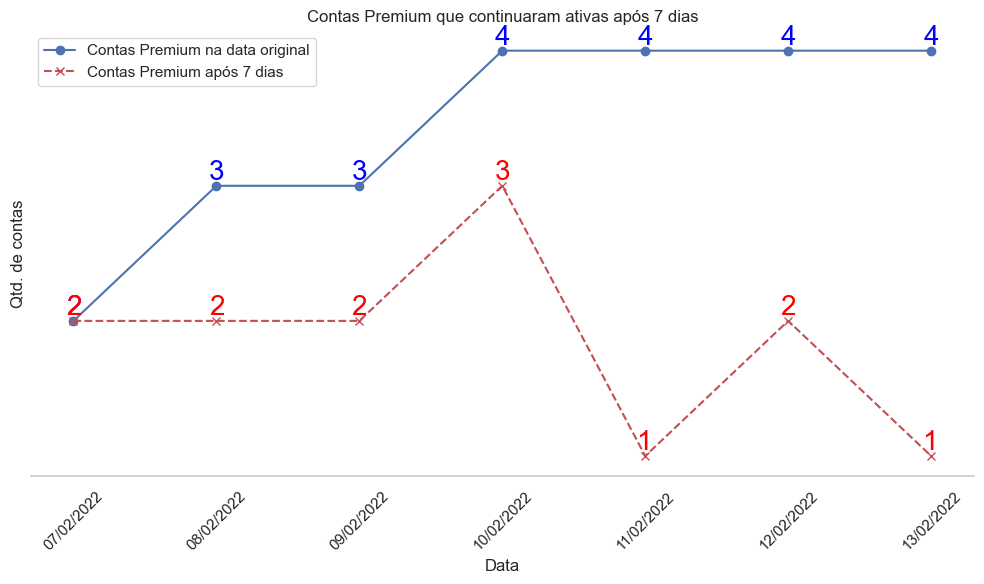

In [35]:
# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(result['DATA'], result['CONTAS_PREMIUM'], label='Contas Premium na data original', marker='o', linestyle='-', color='b')
plt.plot(result['DATA'], result['CONTAS_PREMIUM_NO_7_DIA'], label='Contas Premium após 7 dias', marker='x', linestyle='--', color='r')

# Adicionando rótulos nos pontos
for i, data in enumerate(result['DATA']):
    # Rótulos para as contas premium na data original
    plt.text(data, result['CONTAS_PREMIUM'][i], str(result['CONTAS_PREMIUM'][i]), 
             color='blue', fontsize=20, ha='center', va='bottom')
    # Rótulos para as contas premium após 7 dias
    plt.text(data, result['CONTAS_PREMIUM_NO_7_DIA'][i], str(result['CONTAS_PREMIUM_NO_7_DIA'][i]), 
             color='red', fontsize=20, ha='center', va='bottom')

# Adicionando título e rótulos
plt.title('Contas Premium que continuaram ativas após 7 dias')
plt.xlabel('Data')
plt.ylabel('Qtd. de contas')
plt.legend()

# Removendo a grade e o eixo vertical
plt.grid(False)  # Remove a grade
plt.gca().spines['left'].set_visible(False)  # Remove a linha do eixo vertical (esquerda)
plt.gca().spines['right'].set_visible(False)  # Remove a linha do eixo vertical (direita)
plt.gca().spines['top'].set_visible(False)  # Remove a linha do eixo superior
plt.tick_params(left=False)  # Remove as marcas no eixo vertical (esquerda)
plt.yticks([])  # Remove os rótulos do eixo vertical

# Mantendo apenas o eixo horizontal (Data)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Resultado: 

O número de contas premium que continuam ativas depois de 7 dias tem reduzido ao longo do tempo, mesmo em um período curto de 7 dias.   
Recomendo análise de períodos maiores e estudos complementares com amostra estatísticamente válida. 

---

## **Case 5**
Objetivo: Encontre a **taxa de retenção mensal de usuários** para **cada conta** separadamente para **dezembro de 2020 e janeiro de 2021.**  
A **taxa de retenção** é a porcentagem de usuários ativos que uma conta retém durante um determinado período de tempo.  
Neste caso, **assuma que o usuário é retido se ele/ela permanecer usando o aplicativo em qualquer mês futuro.**  
Por exemplo, **se um usuário esteve ativo em dezembro de 2020** e tem **atividade em qualquer mês futuro**, considere-o **retido para dezembro.**  
Você pode assumir que **todas as contas estão presentes em dezembro de 2020 e janeiro de 2021.**  
Sua saída deve conter **o ID da conta e a taxa de retenção de janeiro de 2021 dividida pela taxa de retenção de dezembro de 2020.**  


**Tabela:** sf_events.

Armazena eventos relacionados à atividade de usuários em diferentes contas ao longo do tempo. Cada registro contém a data do evento, o ID da conta e o ID do usuário. Essa base permite calcular a taxa de retenção de usuários para períodos específicos, analisando a continuidade da atividade.

**Dicionário de dados:**

| **Campo**      | **Tipo**      | **Descrição**                                                       |
|----------------|---------------|---------------------------------------------------------------------|
| **date**       | `datetime`    | Data do evento associado à atividade do usuário.                   |
| **account_id** | `varchar`     | Identificador único da conta que o usuário está utilizando.        |
| **user_id**    | `varchar`     | Identificador único do usuário ativo na conta em uma determinada data. |

## Leitura e validação:

In [36]:
# Carregar o CSV
df_sf_events = pd.read_csv('../Data/Raw/sf_events.csv', sep=";")

valida_df(df_sf_events, 'sf_events')

### 1 - Primeiras linhas do arquivo

,date,account_id,user_id
0,01/01/2021,A1,U1
1,01/01/2021,A1,U2
2,06/01/2021,A1,U3
3,02/01/2021,A1,U1
4,24/12/2020,A1,U2


### 2 - Quantidade de linhas e colunas

(23, 3)


### 3 - Tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        23 non-null     object
 1   account_id  23 non-null     object
 2   user_id     23 non-null     object
dtypes: object(3)
memory usage: 680.0+ bytes
None


### 4 - Estatísticas descritivas

,date,account_id,user_id
count,23,23,23
unique,18,3,8
top,25/12/2020,A1,U4
freq,3,10,5


### 5 - Valores ausentes por coluna

date          0
account_id    0
user_id       0
dtype: int64


### 6 - Valores únicos por coluna

date          18
account_id     3
user_id        8
dtype: int64


### 7 - Valores duplicados

2


## Consulta:

- Crio uma base agrupando as contas e usuários por mês, filtrando apenas o período acima de Dez/2020 para reduzir processamento. 
- Crio uma base apenas com os registros de Dez/2020 e Jan/2021.
- Marco uma flag se os usuários estão ativos em meses futuros.
- Como a base está agrupada por usuário, conta e mês, conto todos os registros para varificar os ativos e somo a flag retidos para verificar os retidos. 
- Por fim, calculo a taxa para cada mês e a diferença entre Jan/2021 e Dez/2020.


In [37]:
query = """
WITH USUARIOS_POR_MES AS (
    SELECT
        ACCOUNT_ID
        ,USER_ID
        -- CONVERTEMOS A DATA PARA O FORMATO ADEQUADO 'YYYY-MM-DD' E DEPOIS EXTRAÍMOS O ANO E O MÊS
        ,EXTRACT(YEAR FROM CAST(SUBSTRING(DATE, 7, 4) || '-' || SUBSTRING(DATE, 4, 2) || '-' || SUBSTRING(DATE, 1, 2) AS DATE)) * 100 + 
        EXTRACT(MONTH FROM CAST(SUBSTRING(DATE, 7, 4) || '-' || SUBSTRING(DATE, 4, 2) || '-' || SUBSTRING(DATE, 1, 2) AS DATE)) AS ANO_MES
    FROM
        df_sf_events
    WHERE 1 = 1
      AND ANO_MES >= 202012
    GROUP BY
        ACCOUNT_ID, USER_ID, ANO_MES
),
USUARIOS_DEZ_JAN AS (
    SELECT
        ANO_MES
        ,ACCOUNT_ID
        ,USER_ID
    FROM
        USUARIOS_POR_MES
    WHERE 1 = 1
      AND ANO_MES IN (202012, 202101)

),
USUARIOS_ATIVOS_RETIDOS AS (
    SELECT
        A.ANO_MES 
        ,A.ACCOUNT_ID
        ,A.USER_ID
        -- VERIFICAR SE O USUÁRIO ESTEVE ATIVO EM QUALQUER MÊS FUTURO
        ,MAX(CASE WHEN A.ANO_MES < B.ANO_MES THEN 1 ELSE 0 END) AS RETIDO
    FROM
        USUARIOS_DEZ_JAN A
    LEFT JOIN
        USUARIOS_POR_MES B 
    ON A.ACCOUNT_ID = B.ACCOUNT_ID 
    AND A.USER_ID = B.USER_ID
    GROUP BY
        A.ANO_MES, A.ACCOUNT_ID, A.USER_ID
),
CONTAS_ATIVOS_RETIDOS AS (
    SELECT
        A.ANO_MES, 
        A.ACCOUNT_ID,
        COUNT(RETIDO) AS ATIVOS,
        SUM(RETIDO) AS RETIDOS
    FROM
        USUARIOS_ATIVOS_RETIDOS A
    GROUP BY A.ANO_MES, 
             A.ACCOUNT_ID
),
TAXA_RETENCAO AS (
    SELECT A.ACCOUNT_ID,
        MAX(CASE WHEN A.ANO_MES = 202012 AND RETIDOS > 0 THEN (RETIDOS / ATIVOS)*100 ELSE 0 END) AS TAXA_RETENCAO_DEZ,
        MAX(CASE WHEN A.ANO_MES = 202101 AND RETIDOS > 0 THEN (RETIDOS / ATIVOS)*100 ELSE 0 END) AS TAXA_RETENCAO_JAN
    FROM CONTAS_ATIVOS_RETIDOS A
    GROUP BY A.ACCOUNT_ID
) 
SELECT ACCOUNT_ID,
       TAXA_RETENCAO_DEZ, 
       TAXA_RETENCAO_JAN,
       CASE WHEN TAXA_RETENCAO_JAN > 0 THEN (TAXA_RETENCAO_JAN / TAXA_RETENCAO_DEZ)*100 ELSE 0 END AS DIF_TAXA_RET_JAN_DEZ
         FROM TAXA_RETENCAO;

"""


# Executar o SQL
result = duckdb.query(query).to_df()

# Mostrar o resultado
display(result)

,account_id,TAXA_RETENCAO_DEZ,TAXA_RETENCAO_JAN,DIF_TAXA_RET_JAN_DEZ
0,A2,100.000000,100.000000,100.0
1,A3,50.000000,0.000000,0.0
2,A1,66.666667,66.666667,100.0


## Resultado: 

A conta A3 teve uma queda significativa na retenção, passando de 50% em dezembro para 0% em janeiro, indicando perda de engajamento.   
A conta A1 manteve uma retenção estável de 66,67% em ambos os meses, o que sugere boa continuidade no engajamento.  
Já a conta A2 teve uma retenção de 100% em ambos os meses, demonstrando alto sucesso em manter os usuários ativos.   
Essas diferenças podem indicar áreas de melhoria para a conta A3 e boas práticas de retenção para as contas A1 e A2.

---

## **Case 6**
Objetivo: **Selecione o `client_id` mais popular** com base na **contagem do número de usuários** que têm pelo menos **50% de seus eventos** da seguinte lista:  
- `'video call received'`
- `'video call sent'`
- `'voice call received'`
- `'voice call sent'`

**Tabela:** fact_events.

A tabela registra eventos detalhados relacionados a chamadas e atividades de usuários em diferentes clientes. 
Cada registro representa um evento individual, incluindo o tipo de evento, o cliente responsável e informações temporais. 
A base é utilizada para análises comportamentais e para identificar padrões de uso por cliente.


**Dicionário de dados:**

| **Campo**       | **Tipo**      | **Descrição**                                                         |
|-----------------|---------------|-----------------------------------------------------------------------|
| **id**          | `int`         | Identificador único do evento (chave primária).                       |
| **time_id**     | `datetime`    | Data e hora em que o evento ocorreu.                                  |
| **user_id**     | `varchar`     | Identificador único do usuário associado ao evento.                   |
| **customer_id** | `varchar`     | Identificador do cliente responsável pelo evento.                     |
| **client_id**   | `varchar`     | Identificador do cliente (software ou aplicativo utilizado).          |
| **event_type**  | `varchar`     | Tipo de evento realizado (ex.: 'video call received', 'voice call sent'). |
| **event_id**    | `int`         | Identificador único do tipo de evento.                                |

## Leitura e validação:

In [38]:
# Carregar o CSV
df_fact_events = pd.read_csv('../Data/Raw/fact_events.csv', sep=";")

valida_df(df_fact_events, 'fact_events')

### 1 - Primeiras linhas do arquivo

,id,time_id,user_id,customer_id,client_id,event_type,event_id
0,1,28/02/2020,3668-QPYBK,Sendit,desktop,message sent,3
1,2,28/02/2020,7892-POOKP,Connectix,mobile,file received,2
2,3,03/04/2020,9763-GRSKD,Zoomit,desktop,video call received,7
3,4,02/04/2020,9763-GRSKD,Connectix,desktop,video call received,7
4,5,06/02/2020,9237-HQITU,Sendit,desktop,video call received,7


### 2 - Quantidade de linhas e colunas

(150, 7)


### 3 - Tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           150 non-null    int64 
 1   time_id      150 non-null    object
 2   user_id      150 non-null    object
 3   customer_id  150 non-null    object
 4   client_id    150 non-null    object
 5   event_type   150 non-null    object
 6   event_id     150 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 8.3+ KB
None


### 4 - Estatísticas descritivas

,id,time_id,user_id,customer_id,client_id,event_type,event_id
count,150.000000,150,150,150,150,150,150.000000
unique,NaN,62,20,5,2,9,NaN
top,NaN,02/03/2020,8091-TTVAX,Connectix,desktop,message received,NaN
freq,NaN,9,11,82,89,29,NaN
mean,75.500000,NaN,NaN,NaN,NaN,NaN,4.246667
std,43.445368,NaN,NaN,NaN,NaN,NaN,2.377006
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,38.250000,NaN,NaN,NaN,NaN,NaN,2.000000
50%,75.500000,NaN,NaN,NaN,NaN,NaN,4.000000
75%,112.750000,NaN,NaN,NaN,NaN,NaN,6.000000


### 5 - Valores ausentes por coluna

id             0
time_id        0
user_id        0
customer_id    0
client_id      0
event_type     0
event_id       0
dtype: int64


### 6 - Valores únicos por coluna

id             150
time_id         62
user_id         20
customer_id      5
client_id        2
event_type       9
event_id         9
dtype: int64


### 7 - Valores duplicados

0


## Consulta:
- Agrupo todos os eventos por usuário e cliente, somando em uma coluna eventos totais e outra com os eventos de interesse que devem ser acima de 50%.
- Calculo quais usuários tiveram pelo menos 50% dos eventos na lista.
- Agrupo por clientes somando os usuarios do perfil acima.
- Por fim, trago apenas o primeiro registro pois o interesse é em saber o mais popular. 

In [40]:
query = """
WITH Eventos AS (
    SELECT
        client_id,
        user_id,
        COUNT(*) AS eventos_total,
        COUNT(CASE WHEN event_type IN ('video call received', 'video call sent', 'voice call received', 'voice call sent') THEN 1 END) AS eventos_50
    FROM df_fact_events
    GROUP BY client_id, user_id
),
UsuariosValidos AS (
    SELECT
        client_id,
        user_id
    FROM Eventos
    WHERE eventos_50 / eventos_total >= 0.5  -- Pelo menos 50% dos eventos são da lista desejada
)
SELECT client_id, COUNT(DISTINCT user_id) AS qtd_usuarios
FROM UsuariosValidos
GROUP BY client_id
ORDER BY qtd_usuarios DESC
LIMIT 1; -- seleciona o mais popular. 
"""

# Executar o SQL
result = duckdb.query(query).to_df()

# Mostrar o resultado
display(result)

,client_id,qtd_usuarios
0,desktop,3


## Resultado: 

O client_id "desktop" é o mais popular, com 3 usuários que têm pelo menos 50% de seus eventos relacionados a chamadas de voz e vídeo, indicando um alto nível de engajamento nesse tipo de atividade.